# Sport Analytics - Olypmics Analysis

Dataset URL - https://www.kaggle.com/the-guardian/olympic-games

In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [295]:
# Importing the Datasets
summer = pd.read_csv('summer.csv')
winter = pd.read_csv('winter.csv')
countries = pd.read_csv('dictionary.csv')
track = pd.read_csv('data.csv')

### Understanding and cleaning the dataset

In [297]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [298]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [299]:
track.head()

,Rank,Time,Name,Country,Date of Birth,Place,City,Date,Gender,Event
0,1,00:01:40.910000,David Rudisha,KEN,1988-12-17,1.0,London,2012-09-08,Men,800 m
1,2,00:01:41.010000,David Rudisha,KEN,1988-12-17,1.0,Rieti,2010-08-29,Men,800 m
2,3,00:01:41.090000,David Rudisha,KEN,1988-12-17,1.0,Berlin,2010-08-22,Men,800 m
3,4,00:01:41.110000,Wilson Kipketer,DEN,1970-12-12,1.0,Köln,1997-08-24,Men,800 m
4,5,00:01:41.240000,Wilson Kipketer,DEN,1970-12-12,1.0,Zürich,1997-08-13,Men,800 m


In [300]:
# Formating the Athlete names
summer['Athlete'] = summer['Athlete'].str.split(', ').str[::-1].str.join(' ').str.title()
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver


In [301]:
winter['Athlete'] = winter['Athlete'].str.split(', ').str[::-1].str.join(' ').str.title()
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,G. Berthet,FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,C. Mandrillon,FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,Maurice Mandrillon,FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,André Vandelle,FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,Adolf Aufdenblatten,SUI,Men,Military Patrol,Gold


In [302]:
countries.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


## 1. Summer Game Analysis

In [303]:
summer = summer.merge(countries, left_on='Country', right_on='Code', how='left')
summer=summer[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
summer.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']

In [304]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,Otto Herschmann,AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,Dimitrios Drivas,GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,Spiridon Chasapis,GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [305]:
male_most_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].index[0]
male_medals = summer[summer['Gender']=='Men']['Athlete'].value_counts()[:1].values[0]
female_most_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].index[0]
female_medals = summer[summer['Gender']=='Women']['Athlete'].value_counts()[:1].values[0]

print('The Highest Decorated Male Athlete is: ',male_most_medals,'with: ',male_medals,' medals')
print('The Highest Decorated Female Athlete is: ',female_most_medals,'with: ',female_medals,' medals')

The Highest Decorated Male Athlete is:  Michael Phelps with:  22  medals
The Highest Decorated Female Athlete is:  Larisa Latynina with:  18  medals


![](https://blog.myswimpro.com/wp-content/uploads/2020/09/phelps-medals.jpg)

In [306]:
# Breakdown by Medals
medals = summer.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending=False)
medals

,Athlete,Medal,Sport
17344,Michael Phelps,Gold,18
3517,Carl Lewis,Gold,9
16581,Mark Spitz,Gold,9
19224,Paavo Nurmi,Gold,9
14731,Larisa Latynina,Gold,9
...,...,...,...
9532,Harald Sandberg,Bronze,1
9531,Harald S.A. Julin,Silver,1
9529,Harald Oliver Faerstad,Silver,1
9528,Harald Norpoth,Silver,1


In [307]:
medals = medals.drop_duplicates(subset=['Medal'], keep='first')
medals

,Athlete,Medal,Sport
17344,Michael Phelps,Gold,18
7645,Franziska Van Almsick,Bronze,6
22307,Shirley Farber Babashoff,Silver,6


In [308]:
# Medals by Country
medals_country = summer.groupby(['Code','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country = medals_country.pivot(index='Code', columns='Medal', values='Gender').fillna(0)
medals_country

Medal,Bronze,Gold,Silver
Code,,,
AFG,2.0,0.0,0.0
AHO,0.0,0.0,1.0
ALG,8.0,5.0,2.0
ANZ,5.0,20.0,4.0
ARG,91.0,69.0,99.0
...,...,...,...
VIE,0.0,0.0,2.0
YUG,118.0,143.0,174.0
ZAM,1.0,0.0,1.0


In [309]:
top = medals_country.sort_values(by='Gold', ascending=False)[:11]
top

Medal,Bronze,Gold,Silver
Code,,,
USA,1098.0,2235.0,1252.0
URS,584.0,838.0,627.0
GBR,553.0,546.0,621.0
ITA,404.0,476.0,416.0
GER,475.0,452.0,378.0
HUN,351.0,412.0,316.0
FRA,497.0,408.0,491.0
SWE,328.0,349.0,367.0
GDR,225.0,329.0,271.0


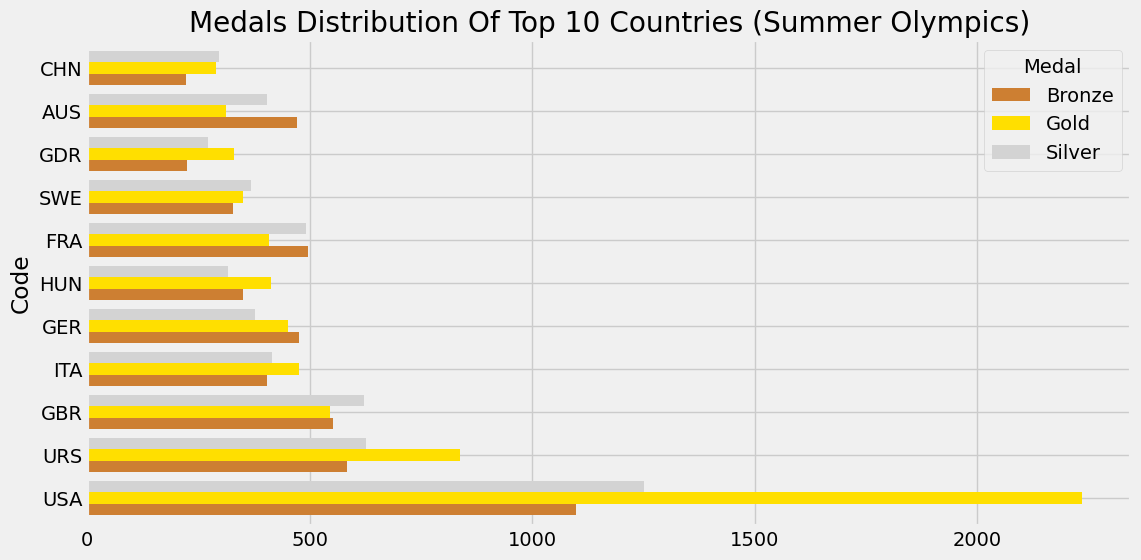

In [310]:
top.plot.barh(width=0.8, color=['#CD7F32','#FFDF00','#D3D3D3'])
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.title('Medals Distribution Of Top 10 Countries (Summer Olympics)')
plt.show()

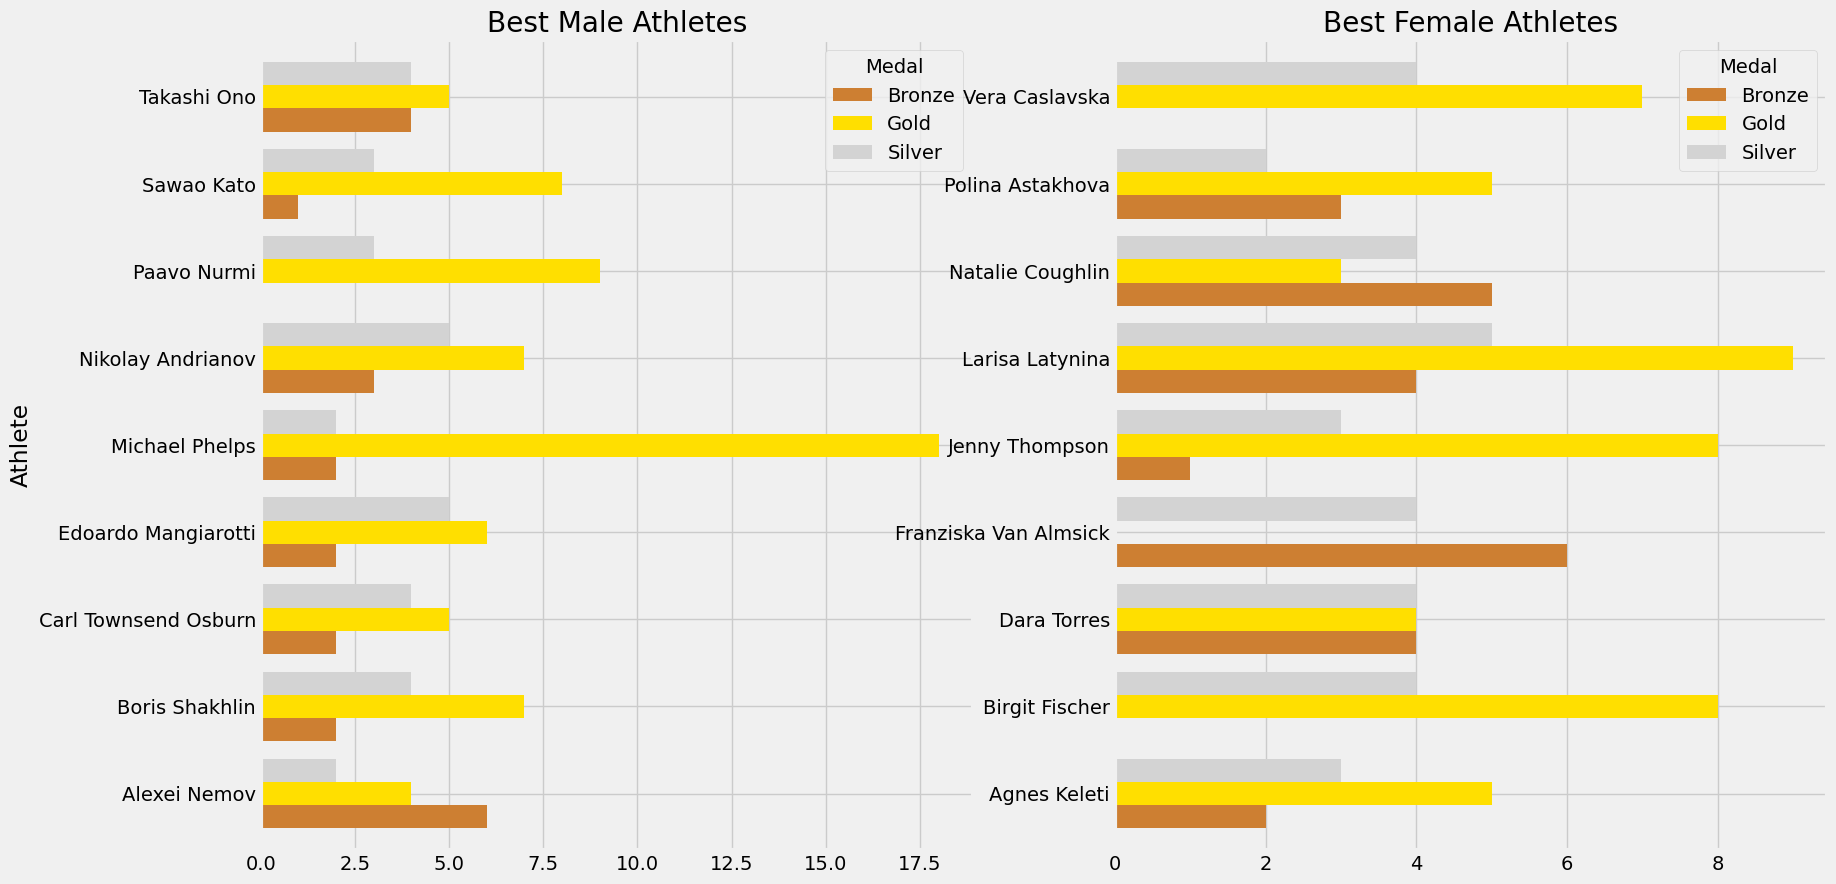

In [311]:
fig,ax=plt.subplots(1,2,figsize=(18,10))

# Data for Male Athletes
men=summer[summer['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(summer['Athlete'].value_counts().index[:15])]
men=men.pivot(index='Athlete',columns='Medal',values='Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

# Data for Women Athletes
women=summer[summer['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(summer['Athlete'].value_counts().index[:30])]
women=women.pivot(index='Athlete',columns='Medal',values='Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()

In [312]:
summer['Discipline'].unique()

array(['Swimming', 'Athletics', 'Cycling Road', 'Cycling Track',
       'Fencing', 'Artistic G.', 'Shooting', 'Tennis', 'Weightlifting',
       'Wrestling Gre-R', 'Water polo', 'Archery', 'Basque Pelota',
       'Cricket', 'Croquet', 'Jumping', 'Football', 'Golf', 'Polo',
       'Rowing', 'Rugby', 'Sailing', 'Tug of War', 'Diving', 'Boxing',
       'Lacrosse', 'Roque', 'Wrestling Free.', 'Hockey', 'Jeu de Paume',
       'Rackets', 'Figure skating', 'Water Motorspor', 'Dressage',
       'Eventing', 'Modern Pentath.', 'Vaulting', 'Ice Hockey',
       'Basketball', 'Canoe / Kayak F', 'Handball', 'Judo', 'Volleyball',
       'Canoe / Kayak S', 'Synchronized S.', 'Rhythmic G.',
       'Table Tennis', 'Badminton', 'Baseball', 'Mountain Bike',
       'Softball', 'Beach volley.', 'Trampoline', 'Taekwondo',
       'Triathlon', 'BMX', 'Marathon swimming', 'Synchronized Swimming',
       'Water Polo', 'Canoe Slalom', 'Canoe Sprint', 'Cycling BMX',
       'Gymnastics Artistic', 'Gymnastics Rhythmi

In [313]:
# Generalizing the Discipline naming 
summer.loc[summer['Discipline'].str.contains('Wrestling'),'Discipline']='Wrestling'
summer.loc[summer['Discipline'].str.contains('Weightlifting'),'Discipline']='Weightlifting'

test= summer[summer['Code'].isin(summer['Code'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
6,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold,Hungary
11,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze,United States
12,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze,Hungary
13,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold,United States


In [314]:
test = test[test['Discipline'].isin(summer['Discipline'].value_counts()[:10].index)]
test.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
0,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,100M Freestyle,Gold,Hungary
6,1896,Athens,Aquatics,Swimming,Alfred Hajos,HUN,Men,1200M Freestyle,Gold,Hungary
11,1896,Athens,Athletics,Athletics,Francis Lane,USA,Men,100M,Bronze,United States
12,1896,Athens,Athletics,Athletics,Alajos Szokolyi,HUN,Men,100M,Bronze,Hungary
13,1896,Athens,Athletics,Athletics,Thomas Burke,USA,Men,100M,Gold,United States


In [315]:
test = test.groupby(['Code', 'Discipline'])['Sport'].count().reset_index()
test.head()

,Code,Discipline,Sport
0,AUS,Athletics,84
1,AUS,Hockey,189
2,AUS,Rowing,135
3,AUS,Sailing,46
4,AUS,Shooting,10


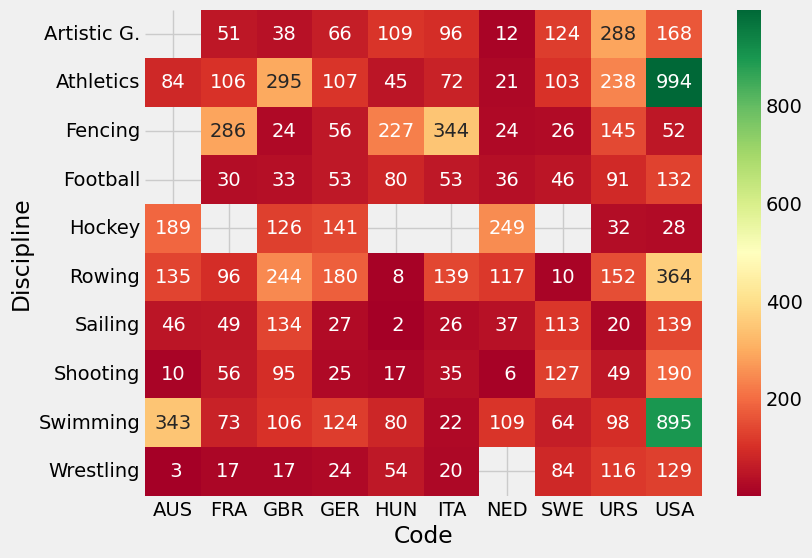

In [316]:
test = test.pivot(index='Discipline', columns='Code', values='Sport')
sns.heatmap(test, cmap='RdYlGn', annot=True, fmt='2.0f')
fig= plt.gcf()
fig.set_size_inches(8,6)
plt.show()

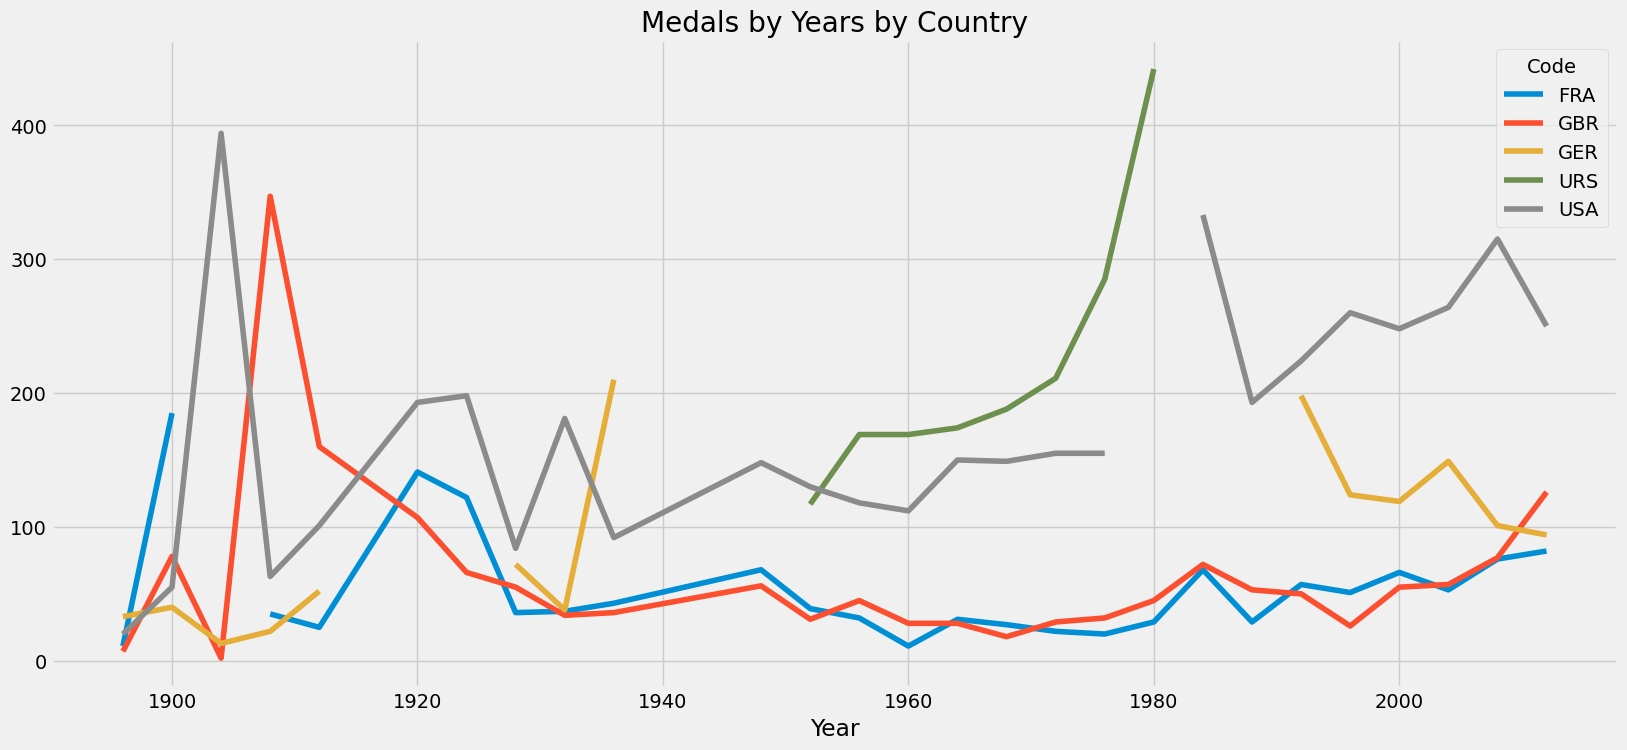

In [317]:
test1 = summer.groupby(['Code', 'Year'])['Medal'].count().reset_index()
test1 = test1[test1['Code'].isin(summer['Code'].value_counts()[:5].index)]
test1 = test1.pivot(index='Year', columns='Code', values='Medal')
test1.plot()
fig = plt.gcf()
fig.set_size_inches(18,8)
plt.title('Medals by Years by Country')
plt.show()

## 2. Winter Game Analysis

In [318]:
print('The Highest Decorated Male Athlete is: ',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].index[0],'with: ',winter[winter['Gender']=='Men']['Athlete'].value_counts()[:1].values[0],' medals')
print('The Highest Decorated Female Athlete is: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].index[0],'with: ',winter[winter['Gender']=='Women']['Athlete'].value_counts()[:1].values[0],' medals')

The Highest Decorated Male Athlete is:  Ole Einar Bjoerndalen with:  13  medals
The Highest Decorated Female Athlete is:  Stefania Belmondo with:  10  medals


In [319]:
winter=winter.merge(countries,left_on='Country',right_on='Code',how='left')
winter=winter[['Year','City','Sport','Discipline','Athlete','Country_x','Gender','Event','Medal','Country_y']]
winter.columns=['Year','City','Sport','Discipline','Athlete','Code','Gender','Event','Medal','Country']
medals=winter.groupby(['Athlete','Medal'])['Sport'].count().reset_index().sort_values(by='Sport',ascending=False)
medals=medals.drop_duplicates(subset=['Medal'],keep='first')
medals.columns=[['Athlete','Medal','Count']]
medals

,Athlete,Medal,Count
569,Björn Daehlie,Gold,8
1655,Harri Kirvesniemi,Bronze,6
3568,Raisa Smetanina,Silver,5


In [320]:
medals_map = winter.groupby(['Country','Code'])['Medal'].count().reset_index()
medals_map

,Country,Code,Medal
0,Australia,AUS,15
1,Austria,AUT,280
2,Belarus,BLR,15
3,Belgium,BEL,13
4,Bulgaria,BUL,6
5,Canada,CAN,625
6,China,CHN,82
7,Croatia,CRO,11
8,Czech Republic,CZE,75
9,Denmark,DEN,5


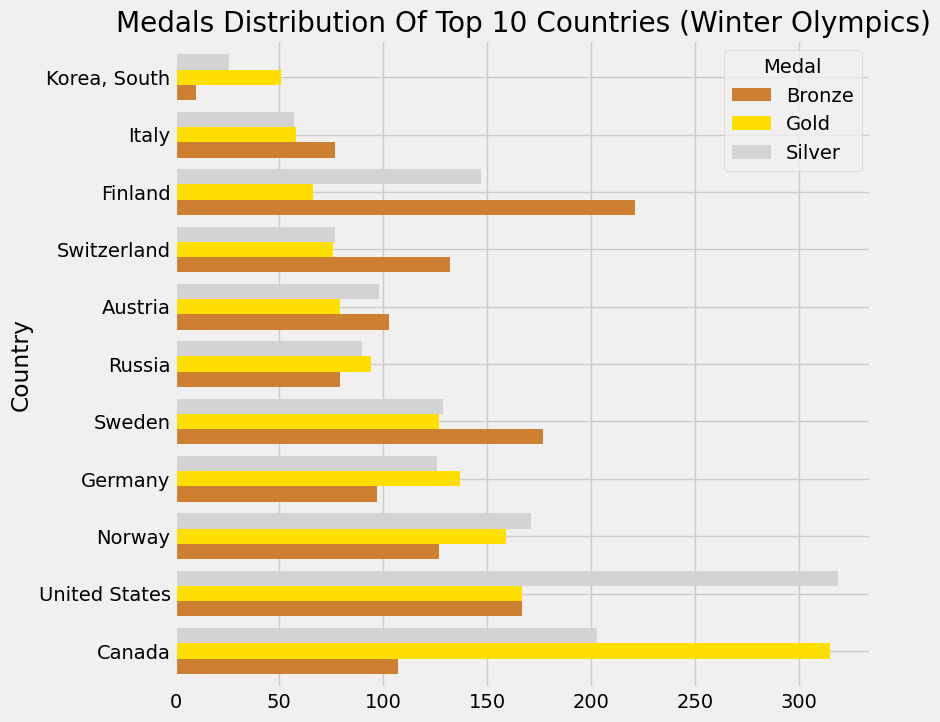

In [321]:
medals_country=winter.groupby(['Country','Medal'])['Gender'].count().reset_index().sort_values(by='Gender',ascending=False)
medals_country=medals_country.pivot(index='Country', columns='Medal', values='Gender').fillna(0)
top=medals_country.sort_values(by='Gold',ascending=False)[:11]
top.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'])
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.title('Medals Distribution Of Top 10 Countries (Winter Olympics)')
plt.show()

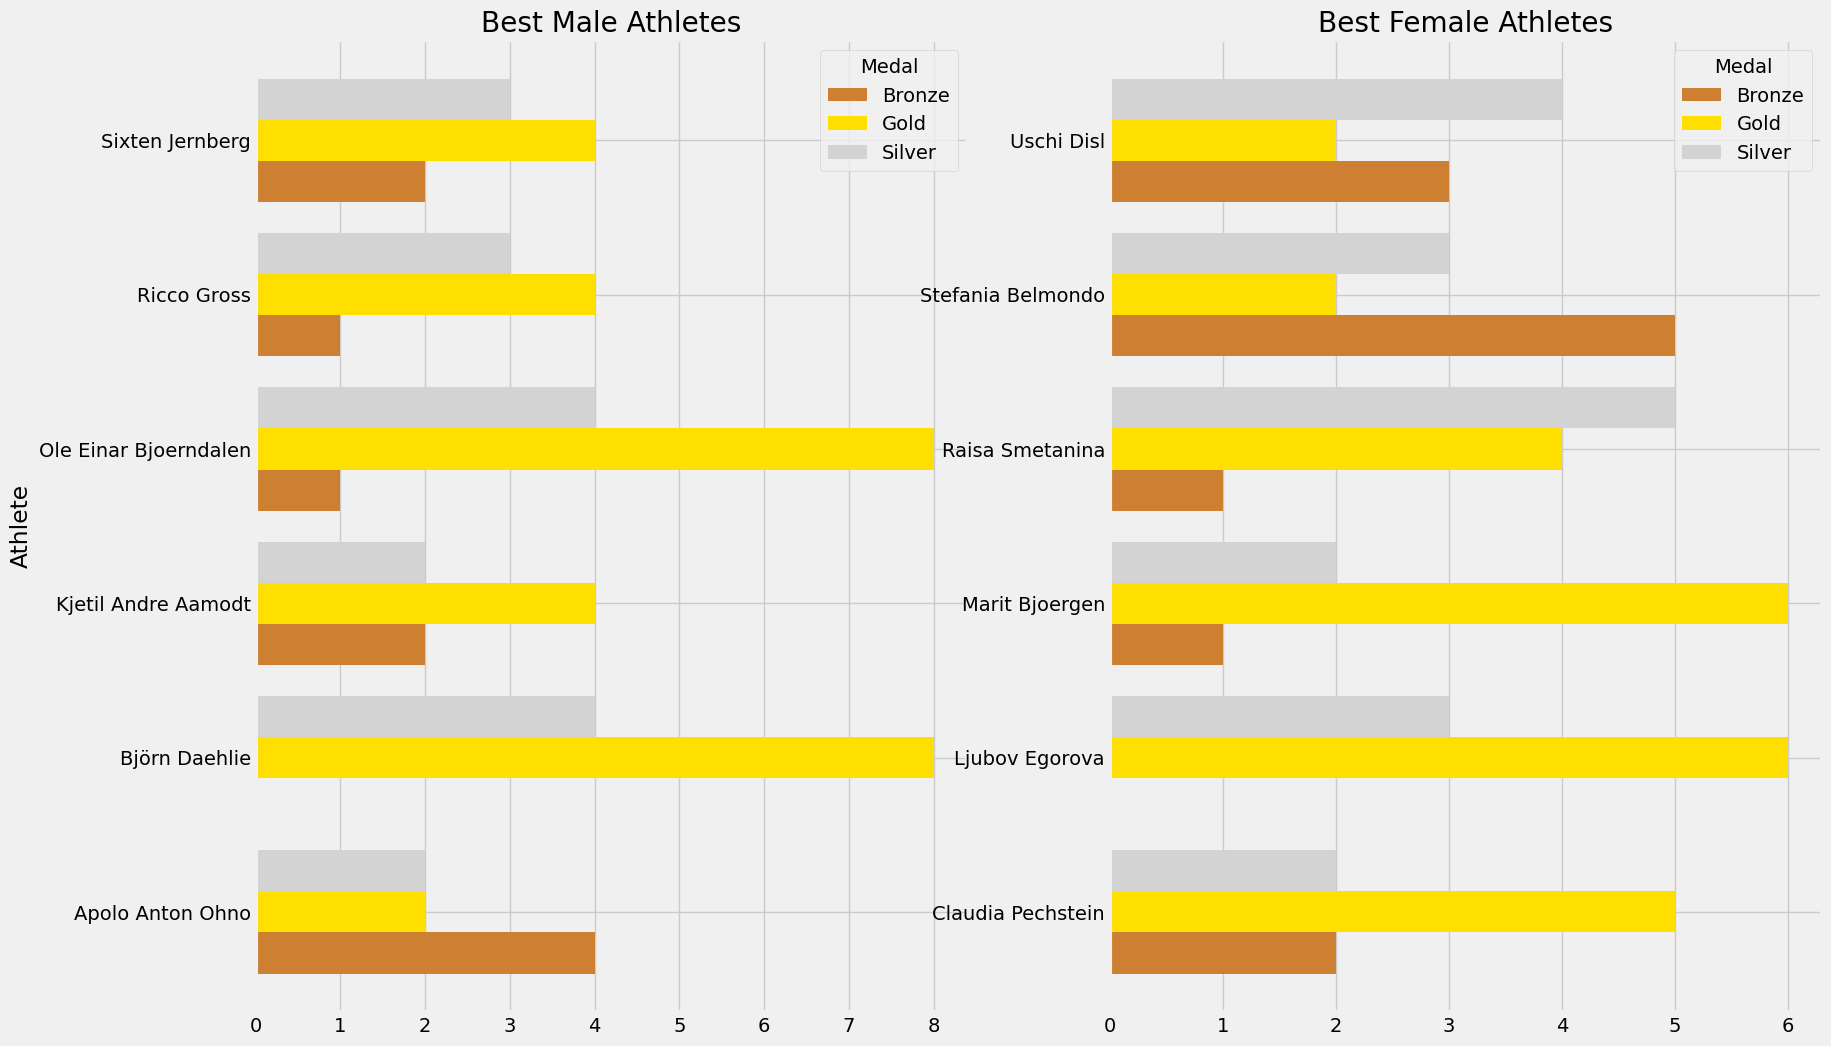

In [322]:
fig,ax=plt.subplots(1,2,figsize=(18,12))

# Data for Men Athletes
men=winter[winter['Gender']=='Men']
men=men.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
men=men[men['Athlete'].isin(winter['Athlete'].value_counts().index[:15])]
men=men.pivot(index='Athlete', columns='Medal', values='Code')
men.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Best Male Athletes')
ax[0].set_ylabel('Athlete')

# Data for Women Athletes
women=winter[winter['Gender']=='Women']
women=women.groupby(['Athlete','Medal'])['Code'].count().reset_index().sort_values(by='Code',ascending=False)
women=women[women['Athlete'].isin(winter['Athlete'].value_counts().index[:10])]
women=women.pivot(index='Athlete', columns='Medal', values='Code')
women.plot.barh(width=0.8,color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[1])
ax[1].set_title('Best Female Athletes')
ax[1].set_ylabel('')
plt.show()